In [1]:
## IMDB 데이터세트 로드

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
## 데이터세트 포멧 확인

print(train_data[0])  # 리뷰 내용, 문장의 단어들을 단어사전인덱스로 표현
print(train_labels[0])  # 긍정 1 / 부정 0

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [3]:
## 리뷰내용의 단어사전인덱스 끝값 확인

max([max(sequence) for sequence in train_data])  # 0 ~ 9999 인덱스로 구성됨 (=10000개의 단어사전)

9999

In [4]:
## 실제 리뷰데이터 확인 (train_data[0] 파싱)

word_index = imdb.get_word_index()  # word_index 는 단어와 정수 인덱스를 매핑한 딕셔너리
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])  # 정수 인덱스와 단어를 매핑하도록 뒤집음
decoded_review = ' '.join( [reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [5]:
## 데이터 세트(정수 시퀀스) 를 이진행렬로 인코딩 (원-핫인코딩)

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(x_train[0])
print(x_test[0])

[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]


In [6]:
## 레이블을 벡터로 변경

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(y_train[0])
print(y_test[0])

1.0
0.0


In [7]:
## 모델 정의

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
## 모델 컴파일

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# ## 모델 컴파일 + 옵티마이저 커스터마이징
# from keras import optimizers
# model.compile(optimizer=optimiziers.RMSprop(lr=0.001),  # 커스텀함수 사용가능
#              loss='binary_crossentropy',
#              metrics=['accuracy'])

# ## 모델 컴파일 + 손실함수 커스터마이징
# from keras import losses
# model.compile(optimizer=optimiziers.RMSprop(lr=0.001),
#              loss=losses.binary_crossentropy,  # 커스텀함수 사용가능
#              metrics=['accuracy'])

# ## 모델 컴파일 + 측정함수 커스터마이징
# from keras import metrics
# model.compile(optimizer=optimiziers.RMSprop(lr=0.001),
#              loss=losses.binary_crossentropy,
#              metrics=[metrics.binary_accuracy])  # 커스텀함수 사용가능

In [9]:
## 검증 데이터세트 준비

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

print(len(x_val))  # 검증용 데이터세트 10000개
print(len(partial_x_train))  # 훈련용 데이터세트 나머지 (원본25000개 - 10000개 = 15000개)
print(len(y_val))  # 검증용 레이블 10000개
print(len(partial_y_train))  # 훈련용 레이블 나머지 (원본25000개 - 10000개 = 15000개)

10000
15000
10000
15000


In [10]:
## 모델 훈련

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

history_dict = history.history
print(history_dict.keys())

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.5050 - acc: 0.7876 - val_loss: 0.3778 - val_acc: 0.8705
Epoch 2/20
15000/15000 [==============================] - 4s 295us/step - loss: 0.2992 - acc: 0.9046 - val_loss: 0.3002 - val_acc: 0.8892
Epoch 3/20
15000/15000 [==============================] - 5s 347us/step - loss: 0.2172 - acc: 0.9284 - val_loss: 0.3082 - val_acc: 0.8717
Epoch 4/20
15000/15000 [==============================] - 3s 204us/step - loss: 0.1747 - acc: 0.9437 - val_loss: 0.2829 - val_acc: 0.8838
Epoch 5/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.1421 - acc: 0.9539 - val_loss: 0.2856 - val_acc: 0.8859
Epoch 6/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.1147 - acc: 0.9653 - val_loss: 0.3143 - val_acc: 0.8779
Epoch 7/20
15000/15000 [==============================] - 2s 150us/step - 

In [11]:
## 훈련손실-검증손실 비교 확인

import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.clf()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()  # 훈련손실은 에포크마다 감소, 검증손실은 에포크마다 증가 (=새로운 데이터에서는 잘 작동하지 않음)

<Figure size 640x480 with 1 Axes>

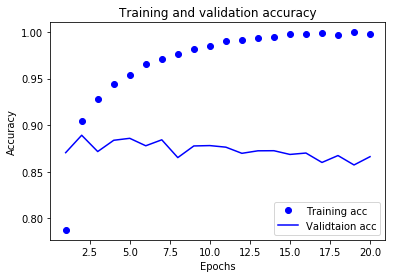

In [12]:
## 훈련정확도-검증정확도 비교 확인

plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validtaion acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()  # 훈련손실은 에포크마다 증가, 검증손실은 에포크마다 조금씩 감소 (=새로운 데이터에서는 정확도가 높지않음)

In [13]:
## 모델 재훈련 (과대적합이 발생한 4에포크까지만 훈련 진행)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 3s 109us/step - loss: 0.4741 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 3s 102us/step - loss: 0.2676 - acc: 0.9089
Epoch 3/4
25000/25000 [==============================] - 3s 111us/step - loss: 0.2031 - acc: 0.9286
Epoch 4/4
25000/25000 [==============================] - 3s 111us/step - loss: 0.1710 - acc: 0.9388


In [14]:
## 모델 평가

results = model.evaluate(x_test, y_test)
print(results)

25000/25000 [==============================] - 3s 109us/step
[0.31231202959060667, 0.8762]


In [15]:
## 훈련된 모델로 새로운 데이터에 대해 예측

predict = model.predict(x_test)
print(predict)  # 예측값이 들쭉날쭉함 (0.13, 0.27 부터 0.99 까지 분포)

[[0.15958941]
 [0.9998472 ]
 [0.3869944 ]
 ...
 [0.08204547]
 [0.04947484]
 [0.4522343 ]]


In [16]:
## 추가실험 (1개의 은닉층 사용)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# model.fit(x_train, y_train, epochs=4, batch_size=512)
# results = model.evaluate(x_test, y_test)
# print(results)

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val)
                   verbose=False)

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.clf()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-16-7d9bc30332e7>, line 21)

In [ ]:
## 추가실험 (3개의 은닉층 사용)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# model.fit(x_train, y_train, epochs=4, batch_size=512)
# results = model.evaluate(x_test, y_test)
# print(results)

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val)
                   verbose=False)

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.clf()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
## 추가실험 (32개 은닉유닛 사용)

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# model.fit(x_train, y_train, epochs=4, batch_size=512)
# results = model.evaluate(x_test, y_test)
# print(results)

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val)
                   verbose=False)

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.clf()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
## 추가실험 (64개 은닉유닛 사용)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# model.fit(x_train, y_train, epochs=4, batch_size=512)
# results = model.evaluate(x_test, y_test)
# print(results)

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val)
                   verbose=False)

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.clf()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
## 추가실험 (mse 손실함수 사용)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['accuracy'])

# model.fit(x_train, y_train, epochs=4, batch_size=512)
# results = model.evaluate(x_test, y_test)
# print(results)

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val)
                   verbose=False)

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.clf()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
## 추가실험 (tanh 활성화함수 사용)

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# model.fit(x_train, y_train, epochs=4, batch_size=512)
# results = model.evaluate(x_test, y_test)
# print(results)

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val),
                   verbose=False)

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.clf()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()